#Libraries and Dates

In [ ]:
#Install libraries
!pip install yfinance
!pip install tfcausalimpact

In [2]:
#Import libraries
import yfinance as yf
from causalimpact import CausalImpact 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Define Dates
training_start = "2020-09-01"
training_end = "2020-10-19"
treatment_start = "2020-10-20"
treatment_end = "2020-10-23"
end_stock = "2020-10-24"

#Loading financial Data

In [4]:
#Bitcoin Data
y = ["BTC-USD"]
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = "1d")
y = y['Adj Close'].rename("y")
y[:1]

[*********************100%***********************]  1 of 1 completed


Date
2020-09-01    11970.478516
Name: y, dtype: float64

In [5]:
#Load more stock data
stocks = ["CARL-B.CO", "ZAL.DE", "SQ", "CRSP", "TRMB", "JD", "DE", "KTOS", "GOOG"]
X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = "1d")
X.head()

[*********************100%***********************]  9 of 9 completed


Adj Close                         ...      Volume                   
             CARL-B.CO       CRSP          DE  ...          SQ       TRMB  ZAL.DE
Date                                           ...                               
2020-09-01  841.202209  93.419998  214.600357  ...  12306400.0   542300.0  790198
2020-09-02  850.005493  93.930000  214.028564  ...  11214800.0   728800.0  496554
2020-09-03  866.242615  85.690002  207.817993  ...  16421200.0  1220300.0  736259
2020-09-04  851.961731  82.019997  208.340469  ...  17995200.0   914700.0  662250
2020-09-07  860.765015        NaN         NaN  ...         NaN        NaN  362062

[5 rows x 54 columns]

In [7]:
#Getting just the adjusted close
X = X.iloc[:,:len(stocks)]
X.head(1)

Adj Close                         ...                          
             CARL-B.CO       CRSP          DE  ...          SQ   TRMB ZAL.DE
Date                                           ...                          
2020-09-01  841.202209  93.419998  214.600357  ...  166.660004  53.41   77.0

[1 rows x 9 columns]

In [8]:
#Removing unneded level
X.columns = X.columns.droplevel()
X.head(1)

,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-09-01,841.202209,93.419998,214.600357,1660.709961,82.489998,19.700001,166.660004,53.41,77.0


In [9]:
#Combine everything
df = pd.concat([y, X], axis = 1).dropna()
df.head()

,y,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-09-01,11970.478516,841.202209,93.419998,214.600357,1660.709961,82.489998,19.700001,166.660004,53.410000,77.000000
2020-09-02,11414.034180,850.005493,93.930000,214.028564,1728.280029,83.209999,19.910000,162.880005,54.310001,77.000000
2020-09-03,10245.296875,866.242615,85.690002,207.817993,1641.839966,79.040001,19.520000,152.860001,50.900002,75.080002
2020-09-04,10511.813477,851.961731,82.019997,208.340469,1591.040039,80.000000,19.260000,146.389999,49.959999,71.739998
2020-09-08,10131.516602,846.484192,81.459999,207.256104,1532.390015,76.220001,19.230000,139.110001,49.139999,73.440002


#Data Analysis

In [10]:
#Prepara Dataframe with only Training Data
df_training = df[df.index <= training_end]
df_training.tail()

,y,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-10-08,10923.627930,870.937744,95.389999,231.709061,1485.930054,78.150002,21.010000,183.500000,51.099998,83.000000
2020-10-14,11429.506836,871.133301,101.370003,235.893341,1568.079956,81.099998,21.010000,187.490005,50.540001,84.980003
2020-10-15,11495.349609,856.069946,99.889999,235.665833,1559.130005,80.250000,21.100000,188.600006,52.290001,84.419998
2020-10-16,11322.123047,848.831665,109.830002,237.466156,1573.010010,81.519997,20.790001,186.350006,52.340000,84.800003
2020-10-19,11742.037109,851.766113,107.720001,235.596588,1534.609985,80.610001,20.639999,186.960007,51.970001,85.000000


In [15]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
test = adfuller(x = df_training.y)[1]
print(test)

#ifelse
if test < 0.05:
  print("The Time Series is stationary")
else:
  print("The Time Series is not stationary")

0.06501179904140769
The Time Series is not stationary


In [18]:
#Differencing
differencing = df_training.pct_change().dropna()
differencing.head()

,y,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-09-02,-0.046485,0.010465,0.005459,-0.002664,0.040687,0.008728,0.010660,-0.022681,0.016851,0.000000
2020-09-03,-0.102395,0.019102,-0.087725,-0.029017,-0.050015,-0.050114,-0.019588,-0.061518,-0.062788,-0.024935
2020-09-04,0.026014,-0.016486,-0.042829,0.002514,-0.030941,0.012146,-0.013320,-0.042326,-0.018468,-0.044486
2020-09-08,-0.036178,-0.006429,-0.006828,-0.005205,-0.036863,-0.047250,-0.001558,-0.049730,-0.016413,0.023697
2020-09-09,0.010939,-0.003929,0.046526,0.025114,0.016034,0.012726,0.016641,0.036662,0.019740,-0.009804


In [19]:
#Adfuller on differenced data
test = adfuller(x = differencing.y)[1]
print(test)

#ifelse
if test < 0.05:
  print("The Time Series is stationary")
else:
  print("The Time Series is not stationary")

4.390298082405667e-06
The Time Series is stationary


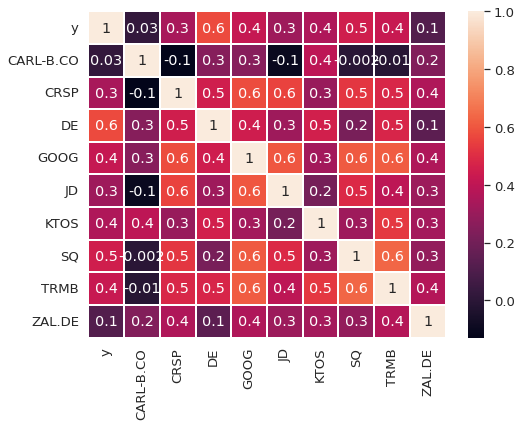

In [22]:
#Correlation matrix
plt.figure(figsize = (8,6))
sns.set(font_scale=1.2)
sns.heatmap(differencing.corr(),
            annot = True,
            fmt = '.1g',
            linewidths = 1,
            linecolor = 'white')

#google Causal Impact

In [24]:
#Prepare the dataset
df_final = df.drop(columns = ["CARL-B.CO", "ZAL.DE"])
df_final.head(1)

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB
Date,,,,,,,,
2020-09-01,11970.478516,93.419998,214.600357,1660.709961,82.489998,19.700001,166.660004,53.41


In [26]:
#Prepare pre and post period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
Do not call `graph_parents`.
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.
Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


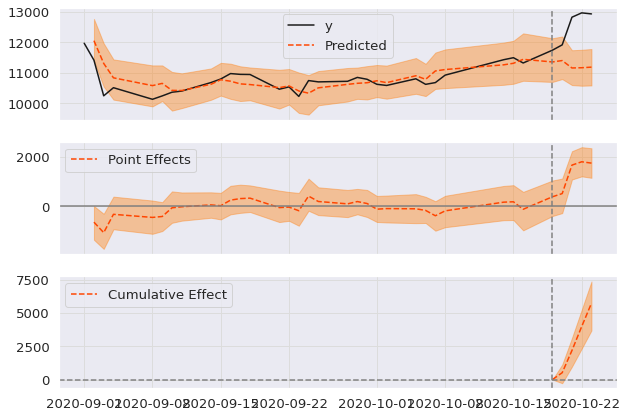

In [28]:
#Google Causal Impact
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)
impact.plot()

In [30]:
#Summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    12659.36           50637.45
Prediction (s.d.)         11228.15 (233.56)  44912.6 (934.24)
95% CI                    [10825.97, 11741.51][43303.88, 46966.02]

Absolute effect (s.d.)    1431.21 (233.56)   5724.85 (934.24)
95% CI                    [917.86, 1833.39]  [3671.43, 7333.57]

Relative effect (s.d.)    12.75% (2.08%)     12.75% (2.08%)
95% CI                    [8.17%, 16.33%]    [8.17%, 16.33%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [31]:
#Summary report
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 12659.36. By contrast, in the absence of an
intervention, we would have expected an average response of 11228.15.
The 95% interval of this counterfactual prediction is [10825.97, 11741.51].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1431.21 with a 95% interval of
[917.86, 1833.39]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 50637.45.
By contrast, had the intervention not taken place, we would have expected
a sum of 44912.6. The 95% interval of this prediction is [43303.88, 46966.02].


The above results are given in terms of absolute numbers. In relative
te